In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


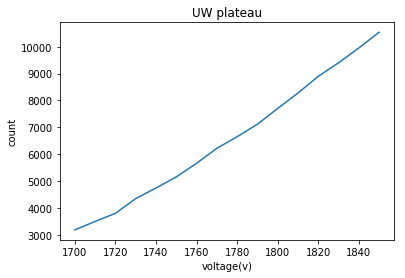

In [2]:
a=[1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850]
b=[3184,3498,3800,4349,4743,5155,5661,6220,6649,7116,7702,8278,8899,9401,9953,10537]

plot(a,b)
title('UW plateau')
xlabel('voltage(v)')
ylabel('count')
show()

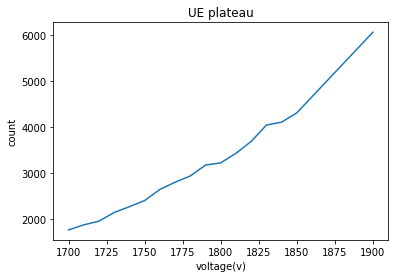

In [3]:
c=[1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1900]
d=[1761,1871,1952,2141,2267,2400,2643,2799,2936,3173,3221,3429,3688,4044,4108,4311,6066]

plot (c,d)
title('UE plateau')
xlabel('voltage(v)')
ylabel('count')
show()

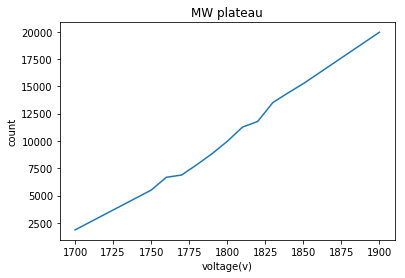

In [5]:
c=[1700,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1900]
d=[1861,5502,6676,6881,7827,8831,9961,11266,11781,13516,14398,15246,19947]

plot (c,d)
title('MW plateau')
xlabel('voltage(v)')
ylabel('count')
show()

Text(0, 0.5, 'count')

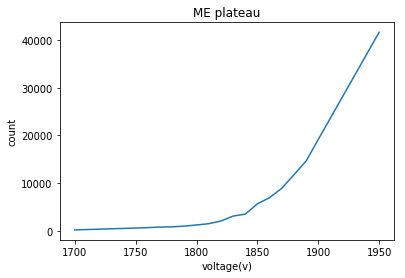

In [6]:
c=[1700,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1950]
d=[231,622,710,826,874,1031,1266,1527,2093,3125,3534,5693,6983,8955,11764,14654,19181,41614]

plot (c,d)
title('ME plateau')
xlabel('voltage(v)')
ylabel('count')

Text(0, 0.5, 'count')

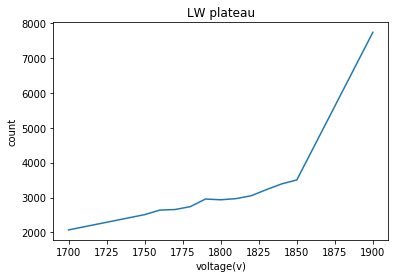

In [7]:

c=[1700,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1900]
d=[2071,2509,2639,2656,2738,2957,2935,2968,3050,3226,3390,3504,7739]

plot (c,d)
title('LW plateau')
xlabel('voltage(v)')
ylabel('count')

Text(0, 0.5, 'count')

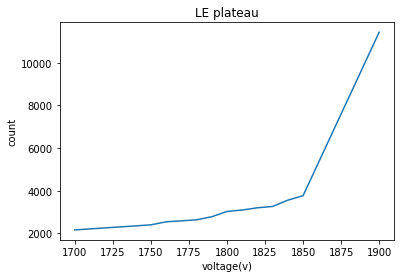

In [8]:
c=[1700,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1900]
d=[2163,2400,2543,2588,2637,2781,3028,3096,3201,3262,3558,3767,11428]

plot (c,d)
title('LE plateau')
xlabel('voltage(v)')
ylabel('count')

In [1]:
%pylab inline
from scipy.optimize import curve_fit
def L(x,m,bi):
    return m*x+bi

Populating the interactive namespace from numpy and matplotlib


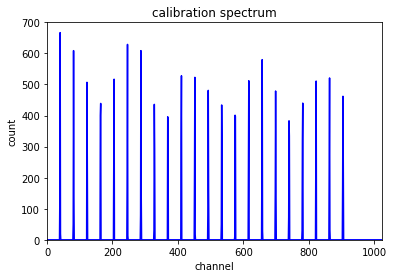

In [2]:
arr=genfromtxt("calibration.txt")
arr=array(arr)
x=linspace(0,len(arr)-1,len(arr))
y=arr
plot(x,y,'b-')
xlabel('channel')
xlim(0,1024)
ylim(0,700)
ylabel('count')
title('calibration spectrum')
show()

In [3]:
n=0
m=0
channel=[]
count=[]
num=[]
M=[]
std=[]
for i in range (len(arr)):
    if arr[i]==0:
        pass
    else:
        channel.append(i)
    
ch=array(channel)
for j in range (len(ch)):
    if j==0:
        count.append(arr[channel[j]])
    elif j==len(ch)-1 :
        num.append(j+1)
        count.append(arr[channel[j]])
    else:
        if channel[j]>channel[j-1]+1:
            num.append(j)
            count.append(arr[channel[j]])
        else:
            count.append(arr[channel[j]])
    
co=array(count)
num=array(num)
for k in range(len(num)):
    if k==0:
        n=num[k]
        M.append(dot(co[0:n],ch[0:n])/sum(co[0:n]))
    else:
        m=num[k-1]
        n=num[k]
        M.append(dot(co[m:n],ch[m:n])/(sum(co[m:n])))
M=around(array(M),2)
print ('the mean values are: ',M)

for k in range(len(M)):
    if k==0:
        n=num[k]
        std.append(((dot(co[0:n],(ch[0:n]-M[k])**2))/(sum(co[0:n])-1))**0.5)
    else:
        m=num[k-1]
        n=num[k]
        std.append(((dot(co[m:n],(ch[m:n]-M[k])**2))/(sum(co[m:n])-1))**0.5)
std=array(std)
std=around(std,2)
print ('the uncertainties are:',std)

the mean values are:  [ 39.86  81.11 122.34 163.52 204.63 245.76 287.07 328.35 369.49 410.62
 451.74 493.07 534.32 575.48 616.64 657.76 699.03 740.33 781.52 822.62
 863.74 905.01]
the uncertainties are: [0.41 0.48 0.48 0.5  0.48 0.46 0.51 0.56 0.5  0.49 0.49 0.6  0.59 0.52
 0.48 0.5  0.64 0.64 0.57 0.49 0.53 0.66]


[0.31 0.63 0.95 1.27 1.59 1.91 2.23 2.55 2.87 3.19 3.51 3.83 4.15 4.47
 4.79 5.11 5.43 5.75 6.07 6.39 6.71 7.03]
0.0078


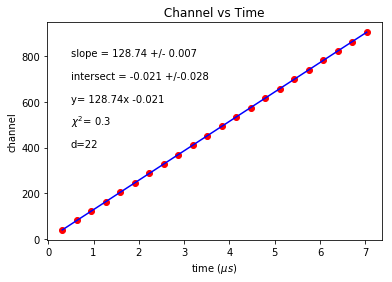

In [4]:
T=0.32
NT=8.0
delay=0.97
st=T-len(num)*T+NT-delay
y=M
x=linspace(st,NT-delay,len(num))
print (x)
plot(x,y,'ro')
yerr=std
xlabel('time ($\mu s$)')
ylabel('channel')
title(' Channel vs Time ')
para, unc = curve_fit(L,x,y,p0=[134.77, 0.01],maxfev=100000000)           
Z=array(L(x,*para))
plot(x,Z, 'b-')
chi=round(sum((Z-y)**2/(std)**2),2)
m=round(para[0],2)
um=round(sqrt(diag(unc)[0]),3)
bi=round(para[1],4)
ub=round(sqrt(diag(unc)[1]),3)
text(0.5,800, 'slope = %s +/- %s' % (m,um))
text(0.5,700, 'intersect = %s +/-%s' % (bi, ub))
text(0.5,600,'y= %sx %s' % (m,bi))
text(0.5,500,r'$\chi^2$= %s' %chi)
text(0.5,400,'d=%s'%(len(x)))
print (round(1/m,4))

In [5]:
from scipy.optimize import curve_fit

In [6]:
arr=genfromtxt("Nov20_data.txt")
arr=array(arr)
def E(x,a,b,c):
    return a*exp(-(x/b))+c
def C(y,z):
    return sum((y-z)**2/z)

def Ch(x):
    return m*x+bi
def T(x):
    return (x-bi)/m
def S(x,Ta,xs):
    return Ta*sqrt((xs**2+ub**2)/(x-bi)**2+(um/m)**2)
def St(x,Ta,xs):
    return Ta*sqrt((xs**2)/(x-bi)**2)

4429.0


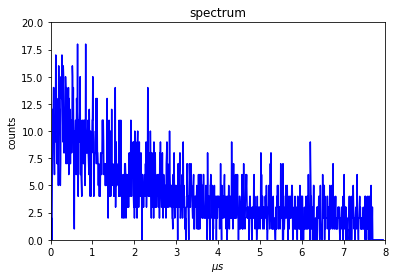

[   0    1    2    4  281  391  416  425  482  490  499  510  526  543
  578  611  619  634  667  691  692  714  716  730  745  759  771  776
  778  798  806  811  813  817  820  828  835  836  843  856  857  890
  899  908  912  914  920  926  936  947  968  972  980  985  991  992
  993  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005 1006
 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020
 1021 1022 1023]


In [7]:
x=linspace(0,len(arr)-1,len(arr))
x_1=1/m*x
y=arr
print (sum(arr))
plot(x_1,y,'b-')
xlabel(r'$\mu s$')
ylabel('counts')
title('spectrum')
xlim(0,8)
ylim(0,20)
show()
print (where(y==0)[0])

In [8]:
mm=991
nn=5
bs=58
ii=linspace(nn+(mm-nn)/(1.0*bs),mm,bs)
print (ii)
y_y3=[]
x_x3=[]
for j in range(len(ii)):
    xx=[]
    yy=[]
    if j==0:
        for i in range(len(x)):
            if nn<x[i]<=ii[0]:
                yy.append(y[i])
                xx.append(x[i])
            else:
                pass
    else:
         for i in range(len(x)):
                if ii[j-1]<x[i]<=ii[j]:
                    yy.append(y[i])
                    xx.append(x[i])
                else:
                    pass
    if sum(yy)==0:
        pass
    else:
        x_x3.append(dot(yy,xx)/sum(yy))
        y_y3.append(sum(yy))
        
y_y3=array(y_y3)
x_x3=array(x_x3)


[ 22.  39.  56.  73.  90. 107. 124. 141. 158. 175. 192. 209. 226. 243.
 260. 277. 294. 311. 328. 345. 362. 379. 396. 413. 430. 447. 464. 481.
 498. 515. 532. 549. 566. 583. 600. 617. 634. 651. 668. 685. 702. 719.
 736. 753. 770. 787. 804. 821. 838. 855. 872. 889. 906. 923. 940. 957.
 974. 991.]


a is: 178.01 +/- 4.25
c is: 29.89 +/- 2.92
chi-square is: 43.73
df is: 55


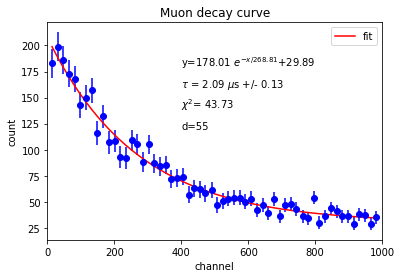

In [16]:
x_3=array(x_x3)
y_3=array(y_y3)
para, unc = curve_fit(E,x_3,y_3,p0=[5,2.2,27],maxfev=100000000)  
a=round(para[0],2)
b=round(para[1],2)
c=round(para[2],2)
Z=array(E(x_3,*para))
yerr=array(sqrt(Z))
errorbar(x_3,y_3,yerr,fmt='o',color='b')
plot (x_3,Z,'r-',label='fit')
ua=round(sqrt(diag(unc)[0]),2)
sb=round(sqrt(diag(unc)[1]),2)
uc=round(sqrt(diag(unc)[2]),2)
chigs=round(C(y_3,Z),2)
print ('a is: %s +/- %s'%(a,ua))
print ('c is: %s +/- %s'%(c,uc)) 
print ('chi-square is:',chigs)
print ('df is:',len(y_3)-3)

title('Muon decay curve')
xlabel('channel')
xlim(0,1000)
ylabel('count')
text(400,180, r'y=%s $e^{-x/%s}$+%s' %(a,b,c))
text(400,160, r'$\tau$ = 2.09 $\mu$s +/- 0.13')
text(400,140,r'$\chi^2$= %s' %chigs)
text(400,120,'d=%s'%(len(x_3)-3))
legend(loc='best')
show()

In [18]:
Tau=(round((T(b)),2))
Sta=round(St(b,Tau,sb),2)
Sys=round(S(b,Tau,0),5)
SMu=round(S(b,Tau,sb),2)
print ('the mean lifetime of muon is: %s us +/- %s'%(Tau,SMu))
print ('the mean lifetime of muon is: %s us +/- %s(stat) +/- %s (syst)'%(Tau,Sta,Sys))

the mean lifetime of muon is: 2.09 us +/- 0.13
the mean lifetime of muon is: 2.09 us +/- 0.13(stat) +/- 0.00025 (syst)
